# Probability and statistics - Chapter 5: Discrete random variables

Using the textbook by Wild & Seber as a guide, I document some statistical lessons in this notebook.

The primary emphasis of the chapter is on discrete random variables and understanding the binomial probability function.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
from scipy import stats, integrate

# Code formatting
%load_ext nb_black

<IPython.core.display.Javascript object>

## Random variables

A **random variable** is a type of measurement taken on the outcome of a random experiment.

## Probability functions

The **probability function** for a discrete random variable $X$ gives:
<br>
$pr(X = x)$
<br>
for every value x that X can take.

### Quiz on sections 5.1 and 5.2

### Exercises for section 5.2

2. Of 200 adults, 176 own one TV set, 22 own two TV sets, and 2 own three TV sets. A person is chosen at random. What is the probability function of X, the number of TV sets owned by that person.

pr(X=1, 2, 3) = 176/200, 22/200, 2/200



## The binomial distribution

### Sampling from a finite population

Many surveys are based on binary answers (yes/no, agree/disagree). In each of these situations, we take a sample of n objects, look at each sampled object to see if it has the characteristic and the count X is the number of sampled objects that have that characteristic.

In almost all real sampling the sample size n is small compared to the population size N. Under these conditions, the probability distribution fo X is well approximated by the Binomial distribution.

Two-color urn-sampling and biased coin tossing models.

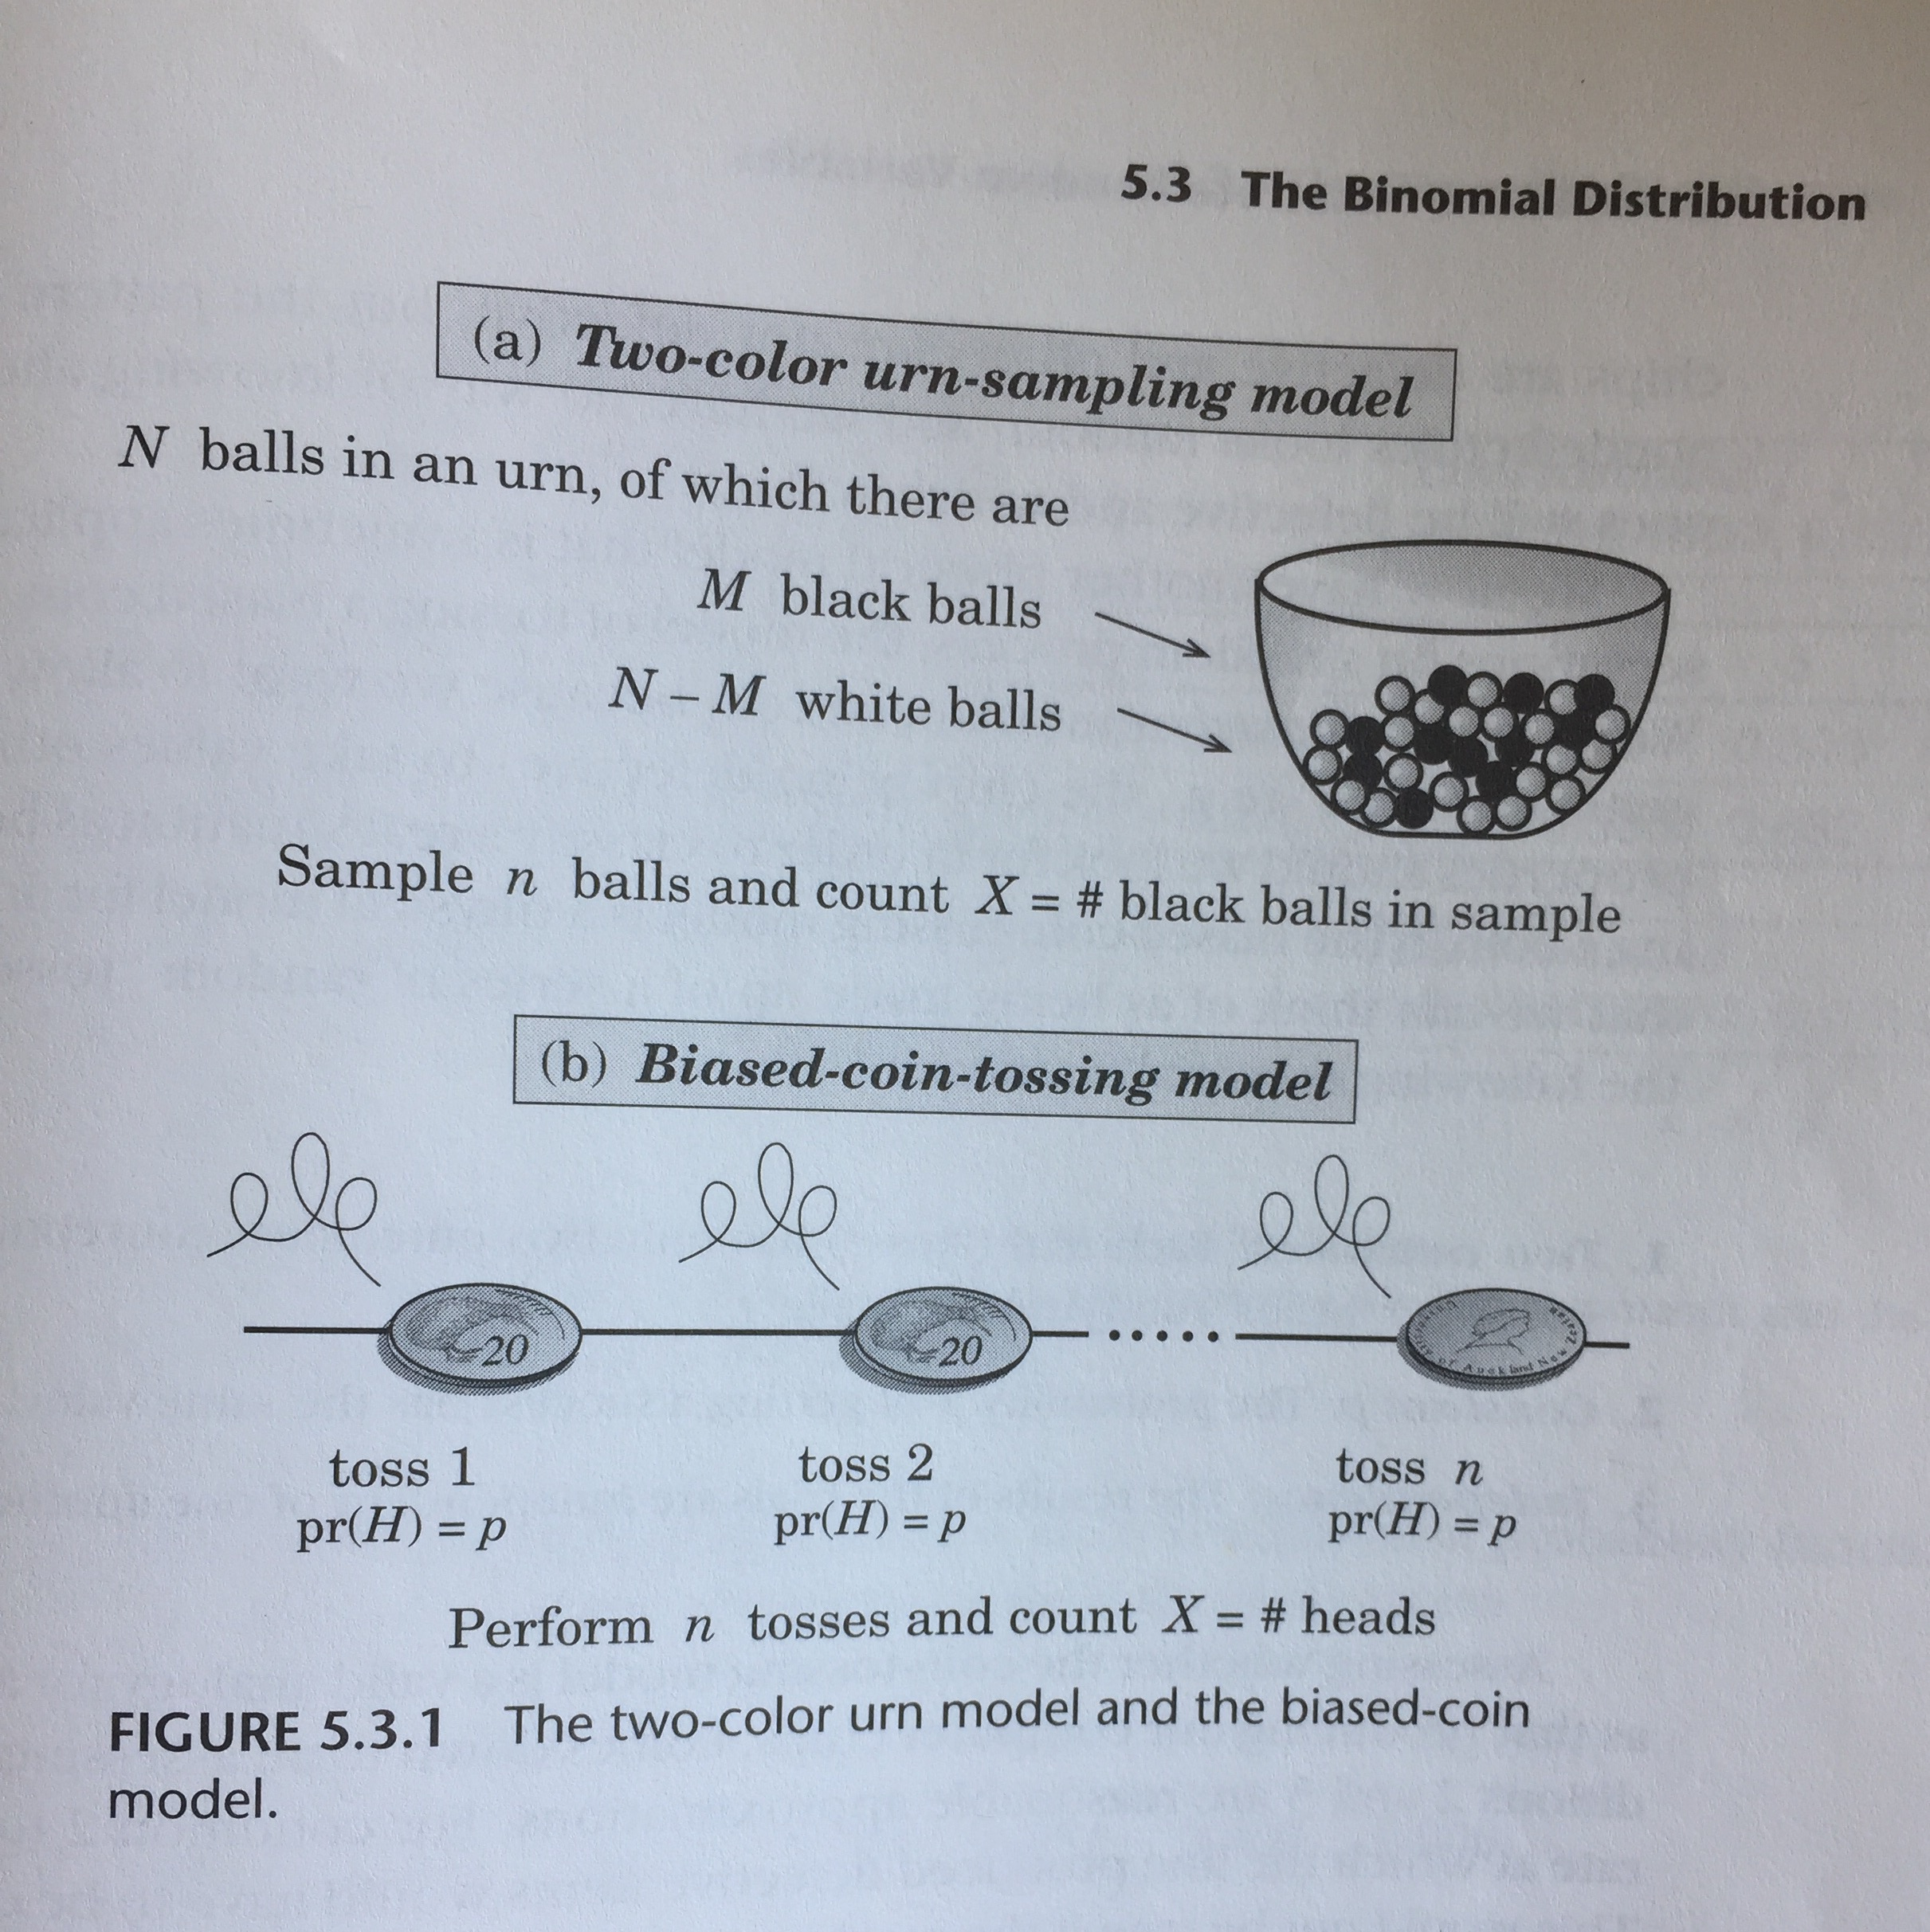

### The binomial assumptions

1. **Two outcomes**
2. **Constant p** the probability of *p* getting a success has the same value, for each trial.
3. **Independence** The results of the trials are independent of each other.

**The distribution of the number of heads in *n* tosses of a biased coin is called the Binomial distribution. The parameters n and p are the parameters of the distribution.**

Other important distributions relating to the biased-coin-tossing model:

- Binomial: distribution of the number of heads in a fixed number of tosses
- Geometric: distribution of the number of tosses up to and including the first head
- Negative binomial: distribution of the number of tosses up to and including the *k*th head

**Using binomial distribution in scipy.stats**

When n=5 and p=0.2, we are talking about the probability distribution of finding X number of heads. Intuitively, we'd expect that 0.2 x 5 = 1 head would be value of the highest probability (the expected value?). We can

0 0.3276799999999999
1 0.40959999999999985
2 0.20479999999999998
3 0.051200000000000016
4 0.006400000000000004
5 0.0003200000000000001


[None, None, None, None, None, None]

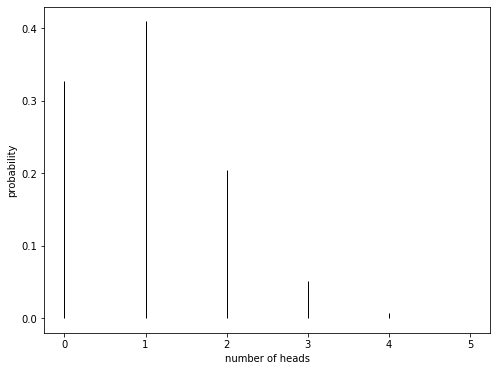

<IPython.core.display.Javascript object>

In [2]:
from scipy.stats import binom
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

n, p = 5, 0.2

fig, ax = plt.subplots(1, 1, figsize=(8,6))

rv = binom(n, p)
x = np.arange(0,6)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.set_ylabel('probability')
ax.set_xlabel('number of heads')

[print(i, rv.pmf(i)) for i in x]


In [8]:
# Note that the k value includes that number
print('Cumulative probability - up to and including 1: {0:0.4f}'.format(rv.cdf(1)))

Cumulative probability - up to and including 1: 0.7373


<IPython.core.display.Javascript object>

### Sampling from a finite population revisited

The two color urn model assumes that sampling is done wtih replacement. However, most real sampling is done *without* replacement. It is not efficient to interview the same person twice or measure the same object twice. Therefore, technically, the assumptions of constant p (probability of selecting a black ball) and the independence condition (a trial is independent of other trials) are violated.

But when the sample size is small, the proportion of black balls in the urn changes very little. Therefore the Binomial distribution can still be a good approximation for the true distribution of X. This accounts for many occasions in which the Binomial distribution is used in practice. A general rule of thumb is that n/N < 0.1 

**Which of the binomial assumptions would be violated if you have a large sample size n, such that n/N > 0.1?**

**The formula for binomial probabilities**

Example: Suppose you need medical treatment for a particular problem. 70% of the doctors would recommend drug treatment and 30% would recommend surgery. You survey three doctors and regard them as a random sample from the population of doctors you might have approached. What are the chances that the majority (two or more) favor surgery?

$pr(X = x) = \binom n x p^x(1-p)^{n-x}$

$\binom n k = \frac{n!}{(n-k)!k!}$

In [9]:
# With scipy.stats
n = 3
p = 0.3
rv = binom(n, p)

print("probability of X >= 2 is {0:0.4f}".format(1 - rv.cdf(1)))

probability of X >= 2 is 0.2160


<IPython.core.display.Javascript object>

In [10]:
# Calculating by hand

# n is 3, k is 2, p is 0.3

binom_coefficient_k2 = (3*2*1)/((3-2)*2)
term1_k2 = 0.3**2
term2_k2 = (1 - 0.3)**(3-2)

pr_2 = binom_coefficient_k2*term1_k2*term2_k2

binom_coefficient_k3 = (3*2*1)/((1)*(3*2*1))
term1_k3 = 0.3**3
term2_k3 = (1 - 0.3)**(3-3)

pr_3 = binom_coefficient_k3*term1_k3*term2_k3

print('prob of 2: {0:.04f} and prob of 3 {1:.04f}'.format(pr_2, pr_3))
print('prob of 2 or 3: {0:.04f}'.format(pr_2 + pr_3))

prob of 2: 0.1890 and prob of 3 0.0270
prob of 2 or 3: 0.2160


<IPython.core.display.Javascript object>

### Exercises for section 5.3

Checking use of scipy. If X~Binomial(n=10, p=0.3), what is the cumulative probability in each case (except a).

1. pr(X=3)
2. pr(X >= 4)
3. pr(X > 6)
4. pr(X < 7)
5. pr(X <= 1)
6. pr(3 < X < 8)

In [37]:
n, p = 10, 0.3
rv = binom(n, p)

print("X = 3  ", rv.pmf(3))
print("X >= 4  ", 1 - rv.cdf(3))
print("X > 6  ", 1 - rv.cdf(6))
print("X < 7  ", rv.cdf(6))
print("X <=1", rv.cdf(1))
print("3 < X < 8  ", rv.cdf(7) - rv.cdf(3))

# x = np.arange(0,6)
# ax.vlines(x, 0, rv.pmf(x)

X = 3   0.26682793200000016
X >= 4   0.35038928160000016
X > 6   0.010592078399999982
X < 7   0.9894079216
X <=1 0.1493083459
3 < X < 8   0.3487988952000002


<IPython.core.display.Javascript object>

## Expected values


### Formula and technology

The **expected value of a random variable** can be understood from an example like the following.

Imagine that you're asked to play a game that costs USD  1.50 to play. The player wins USD 1, 2, 3 with respective probabilities of 0.6, 0.3 and 0.1. Is it worth it to play?

#### Expected winnings from gambling

##### Weighted average approach

My intuition of going about this is to first look at this as weighted average.

In [30]:
avg_prize_money = 1 * 0.6 + 2 * 0.3 + 3 * 0.1

print("Result of weighted average {0:0.2f}".format(avg_prize_money))

Result of weighted average 1.50


<IPython.core.display.Javascript object>

##### Simulation approach

Another approach is to use a simulation. Let's say that a program can choose the different winning values at the stated probabilities.

**Here's how to make a custom discrete distribution with scipy stats**

[discrete distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html)

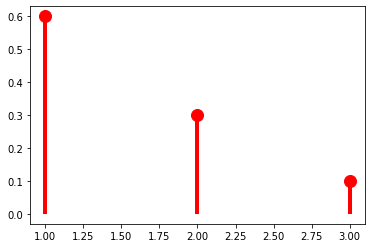

<IPython.core.display.Javascript object>

In [34]:
from scipy import stats

xk = [1, 2, 3]
pk = [0.6, 0.3, 0.1]
custom_dist = stats.rv_discrete(name="custom_dist", values=[xk, pk])

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
ax.plot(xk, custom_dist.pmf(xk), "ro", ms=12, mec="r")
ax.vlines(xk, 0, custom_dist.pmf(xk), colors="r", lw=4)

In [44]:
# Take samples from this distribution
n = 10
n_vals = [custom_dist.rvs() for i in range(n)]
n_vals

[1, 1, 1, 2, 2, 1, 2, 3, 2, 3]

<IPython.core.display.Javascript object>

In [46]:
# Take samples from this distribution
n = 10000
n_vals = [custom_dist.rvs() for i in range(n)]

<IPython.core.display.Javascript object>

In [49]:
# Determine the simulation produced expected value by taking the sum of values divided by the number of samples
sim_exp_value = sum(n_vals) / n
print("Simulation produced expected value: {0:0.4f}".format(sim_exp_value))

Simulation produced expected value: 1.5027


<IPython.core.display.Javascript object>

#### Expected value formula (generic)

The **expected value**: $E(X) = \Sigma xpr(x) $ = Sum of $(value \times probability of value)$

#### Expected value for a binomial distribution

$E(X) = \Sigma xpr(x) = np $

$ \mu_X = E(X)$ is called the **mean** of the distribution of X

#### Expected value for a finite population

Suppose we consider a finite population of 200 students taking a particular university course. We know that 120 have one assignment due, 60 have two assignments due, and 20 have three assignments due.

Conceptually, calculating the expected number of assignments due is similar to previous problems, but here, it is called the population mean.

$ \mu_X = E(X)$ is usually called the **population mean**

This is similar to the above where it is an ordinary average batch of numbers.

Another way to think of $\mu_X$ is that it is the point where the bar graph of $pr(X=x)$ balances.

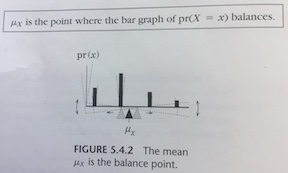

#### Exercises

2. Compute $\mu_X = E(X)$ where X ~ Binomial(n=2, p=0.3) and check that your answer equals $ n \times p$.

We need the values of all possibilities of X and their probabilities.

The possible values are 0, 1, and 2. To get the probabilities, we can look at a table or use what scipy.stats gives us.

In [59]:
from scipy.stats import binom

n, p = 2, 0.3
rv = binom(n, p)
x_list = np.arange(0,3)
[print('value: {0:d}, prob: {1:0.4f}'.format(x,rv.pmf(x))) for x in x_list]


value: 0, prob: 0.4900
value: 1, prob: 0.4200
value: 2, prob: 0.0900


[None, None, None]

<IPython.core.display.Javascript object>

This distribution looks like this

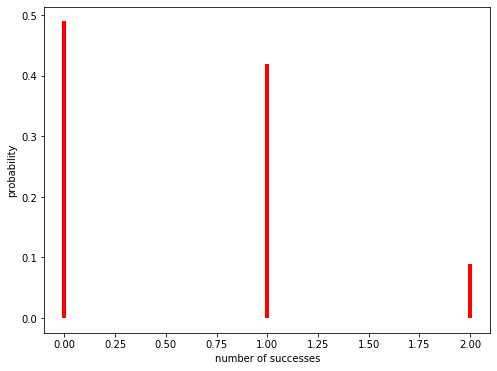

<IPython.core.display.Javascript object>

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
rv = binom(n, p)
x_list = np.arange(0, 3)
ax.vlines(x_list, 0, rv.pmf(x_list), colors="k", color="r", lw=4, label="frozen pmf")
ax.set_ylabel("probability")
ax.set_xlabel("number of successes")

In [65]:
# Calculating the expected value by hand
exp_value = 0 * 0.4900 + 1 * 0.4200 + 2 * 0.0900
print(exp_value)

0.6


<IPython.core.display.Javascript object>

Note that this equals $n \times p = 3 \times 0.2$

### Population standard deviation

The population standard deviation is:
    
$ sd(X) = \sqrt{E[(X - \mu)^2]} $

The standard deviation is the square root of the average squared distance of X from the mean $\mu$, but **for distributions we use E(.) to do the averaging**.

Like with population mean and sample mean, here we are distinguishing from the *sample* standard deviation which is the standard deviation of a batch of numbers.

For discrete distributions:

$ E[(X - \mu)^2] = \Sigma(x-\mu)^2 pr(x)$

**Standard deviation for a binomial distribution**

If X ~ Bin(n=3, p=0.1), then X can take values 0, 1, 2, 3.

The expected value ($\mu$) is 0.3.

$ E[(X - \mu)^2] = \Sigma(x-\mu)^2 pr(x) $     
(Note how this is the formula for variance)
<br>
$ = (0-0.3)^2pr(0) + (1-0.3)^2pr(1) + (2-0.3)^2pr(2) + (3-0.3)^2pr(3) $
<br>
$ = 0.27 $

Taking the square root:

$ \sqrt{0.27} = 0.5196 $

For the binomial distribution:
<br>
$sd(X) = \sqrt{np(1-p)}$


Verify Python output

In [14]:
from scipy.stats import binom
n, p = 3, 0.1

rv = binom(n, p)
rv.std()

0.5196152422706632

<IPython.core.display.Javascript object>

In [1]:
from scipy.stats import binom

# T10 group
n, p = 100, 0.1
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
rv = binom(n, p)
x = np.arange(0, 45)
ax.vlines(x, 0, rv.pmf(x), colors="k", linestyles="-", lw=2, label="T10")

NameError: name 'plt' is not defined

### The effect of rescaling random variables

E(aX + b) = aE(x) + b
<br>
and
<br>
sd(aX + b) = |a|sd(X)

A new standard deviation is scaled for multiplication but stays the same for addition. 

How does this apply to count and proportion for the binomial distribution?

If Y is a count and is the number of heads in n tosses of a biased coin, then
Y ~ Binomial(n,p).

The proportion of heads is simply Y/n, which we denote $\hat{P}$. What is $E(\hat{P})$ and $sd(\hat{P})$?

$E(\hat{P}) = E(1/n \times Y) = (1/n \times np) = p$

$sd(\hat{P}) = sd(1/n \times Y) = (1/n)sd(Y) = (1/n)\sqrt{np(1-p)} = \sqrt{\frac{p(1-p)}{n}}$
